In [15]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# Basic modeling of time series

* Correlation
* Noise and random walk
* Modeling: AR, MA, ARMA
* Stationarity, ARIMA, SARIMA

# Correlation

![](images/correlation.png)

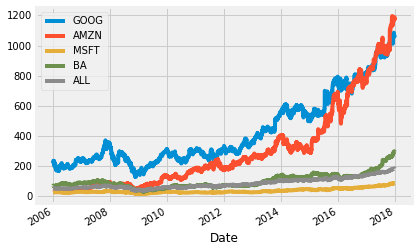

In [21]:
import pandas as pd

google = pd.read_csv('stocks/GOOGL_2006-01-01_to_2018-01-01.csv', 
                     index_col='Date', parse_dates=['Date'])
amazon = pd.read_csv('stocks/AMZN_2006-01-01_to_2018-01-01.csv', 
                     index_col='Date', parse_dates=['Date'])
microsoft = pd.read_csv('stocks/MSFT_2006-01-01_to_2018-01-01.csv', 
                     index_col='Date', parse_dates=['Date'])
boeing = pd.read_csv('stocks/BA_2006-01-01_to_2018-01-01.csv', 
                     index_col='Date', parse_dates=['Date'])
all_stocks = pd.read_csv('stocks/all_stocks_2006-01-01_to_2018-01-01.csv', 
                     index_col='Date', parse_dates=['Date'])

all_stocks = all_stocks.groupby('Date').mean()



stocks.plot()



Scatter plot can be used to easily see the correlation between series visually. 

![](images/scatter_corr.png)

Let see for example the correlation of daily returns of our stocks.

,GOOG,AMZN,MSFT,BA,ALL
Date,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.023000,-0.006936,0.004844,0.010363,0.004240
2006-01-05,0.013507,0.008466,0.000742,-0.011803,0.001818
2006-01-06,0.031924,0.004617,-0.002964,-0.013934,0.012886
2006-01-09,0.002660,-0.016503,-0.001858,-0.008363,0.003240


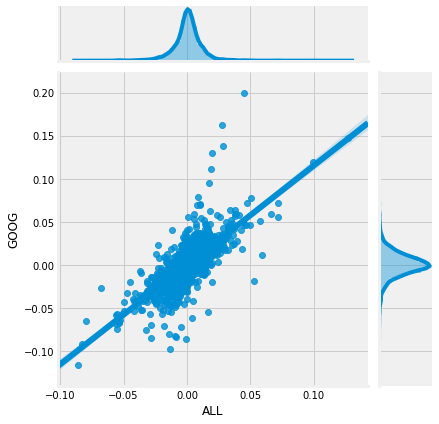

In [19]:
import seaborn as sns

daily_returns = stocks.pct_change()

sns.jointplot(x='ALL', y='GOOG', data=daily_returns, kind='reg')

daily_returns.head()

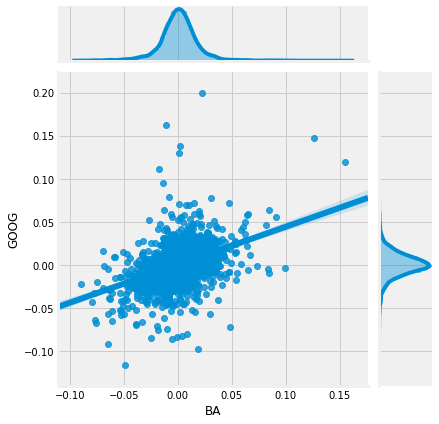

In [4]:
sns.jointplot(x='BA', y='GOOG', data=daily_returns, kind='reg')

          GOOG      AMZN      MSFT        BA       ALL
GOOG  1.000000  0.502819  0.500224  0.417781  0.753493
AMZN  0.502819  1.000000  0.456073  0.385250  0.659110
MSFT  0.500224  0.456073  1.000000  0.472068  0.700017
BA    0.417781  0.385250  0.472068  1.000000  0.689267
ALL   0.753493  0.659110  0.700017  0.689267  1.000000


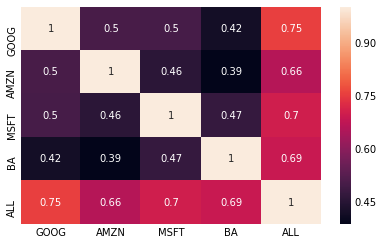

In [5]:
correlations=daily_returns.corr()
print (correlations)
sns.heatmap(correlations, annot=True)

## Regression

Simple linear regression allow to estimate a series Y based on a series Y, by fitting the following simple model:

Y<sub>t</sub> = α + βX<sub>t</sub> + ε<sub>t</sub> 

where α is a constant and ε is noise.

This can be easily done as in the following example:

In [23]:
import statsmodels.api as sm

#add a constant to data for regression model
data = sm.add_constant(stocks).dropna()
data.head()

,const,GOOG,AMZN,MSFT,BA,ALL
Date,,,,,,
2006-01-03,1.0,217.83,47.58,26.84,70.44,51.580000
2006-01-04,1.0,222.84,47.25,26.97,71.17,51.798710
2006-01-05,1.0,225.85,47.65,26.99,70.33,51.892903
2006-01-06,1.0,233.06,47.87,26.91,69.35,52.561613
2006-01-09,1.0,233.68,47.08,26.86,68.77,52.731935


In [25]:
results = sm.OLS(data['GOOG'],data[['const','BA']]).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GOOG   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 1.517e+04
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:09:50   Log-Likelihood:                -18072.
No. Observations:                3019   AIC:                         3.615e+04
Df Residuals:                    3017   BIC:                         3.616e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.4383      4.137     -8.083      0.000     -41.550     -25.327
BA             4.5455      0.037    123.150      0.000       4.473       4.618
==============================================================================
Omnibus:                       27.584   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.237
Skew:                           0.236   Prob(JB):                     7.39e-07
Kurtosis:                       2.963   Cond. No.                         265.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Autocorrelation and Partial Autocorrelation</a>
* Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags.  The terms can be interpreted the same way as a standard  linear regression, that is the contribution of a change in that particular lag while holding others constant.


![](images/autocorr1.png)
![](images/autocorr2.png)
![](images/autocorr3.png)


 As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

In [27]:
humidity = pd.read_csv('weather/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.tail()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,87.0,81.0,22.0,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,58.0,64.0,37.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 21:00:00,87.0,71.0,22.0,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,58.0,59.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 22:00:00,87.0,71.0,22.0,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,58.0,66.0,74.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-29 23:00:00,87.0,71.0,22.0,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0
2017-11-30 00:00:00,87.0,76.0,22.0,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,58.0,58.0,56.0,57.0,60.0,100.0,96.0,96.0,60.0


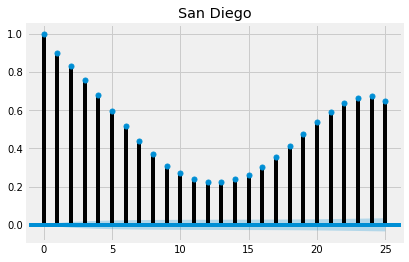

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

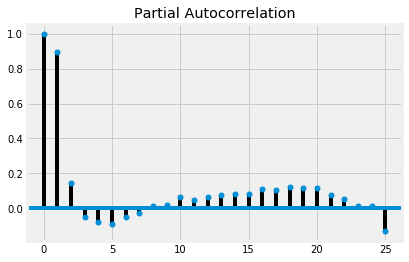

In [29]:
# Partial Autocorrelation of humidity of San Diego
fig = plot_pacf(humidity["San Diego"],lags=25)
plt.show()

Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

# Noise and Random Walks

## White noise
White noise has...
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

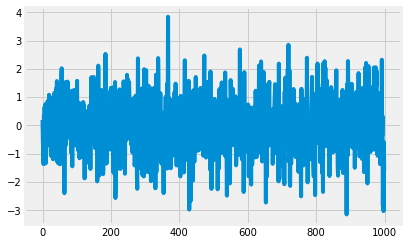

In [32]:
import numpy as np

# Plotting white noise
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

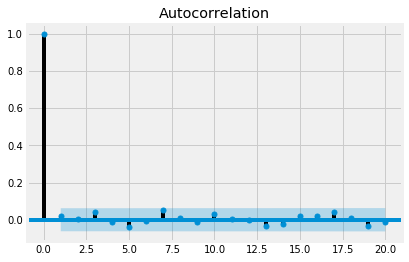

In [33]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

## Random Walk

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. 

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

#### X<sub>t</sub> = X<sub>t-1</sub> + ε<sub>t</sub> 

Random walks can't be forecasted because well, noise is random.

Random Walk with Drift(drift(μ) is zero-mean)
#### X<sub>t</sub> - X<sub>t-1</sub> = μ + ε<sub>t</sub> 
<br>
Regression test for random walk 
#### P<sub>t</sub> = α + βX<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  X<sub>t</sub> - X<sub>t-1</sub> = α + βX<sub>t-1</sub> + ε<sub>t</sub>
<br>
Test:
#### H<sub>0</sub>: β = 1 (This is a random walk)
#### H<sub>1</sub>: β < 1 (This is not a random walk)
<br>
Dickey-Fuller Test:
#### H<sub>0</sub>: β = 0 (This is a random walk)
#### H<sub>1</sub>: β < 0 (This is not a random walk)

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [13]:
# Augmented Dickey-Fuller test on volume and price of google stocks 
from statsmodels.tsa.stattools import adfuller
adf = adfuller(google["Volume"])
print("p-value of google volume: {}".format(float(adf[1])))
adf = adfuller(google["Close"])
print("p-value of google price: {}".format(float(adf[1])))


p-value of google volume: 6.51071960576854e-07
p-value of google price: 0.9967315857800989


##### Now google volume has p-value 0.0000006510 which is more than 0.05, null hypothesis is rejected and this is not a  random walk. Instead price with p-value close to 1 is a random walk.

### Generating a random walk

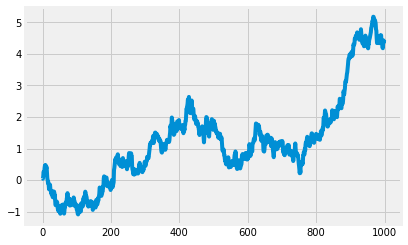

In [34]:
np.random.seed(42)
random_walk = np.random.normal(loc=0.0025, scale=0.1, size=1000).cumsum()
plt.plot(random_walk)
plt.show()

# Modelling series: AR, MA e ARMA

For now, we focus on stationary time series: series whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
* Strong stationarity:  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

## AR models
 An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.
 #### AR(1) model
 R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>
 ##### As it appears only one lagged value(R<sub>t-1</sub>)this is called AR model of order 1 where μ is mean and ε is noise at time t
 If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.
 #### AR(2) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>
 #### AR(3) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>

### Simulating AR(1) model

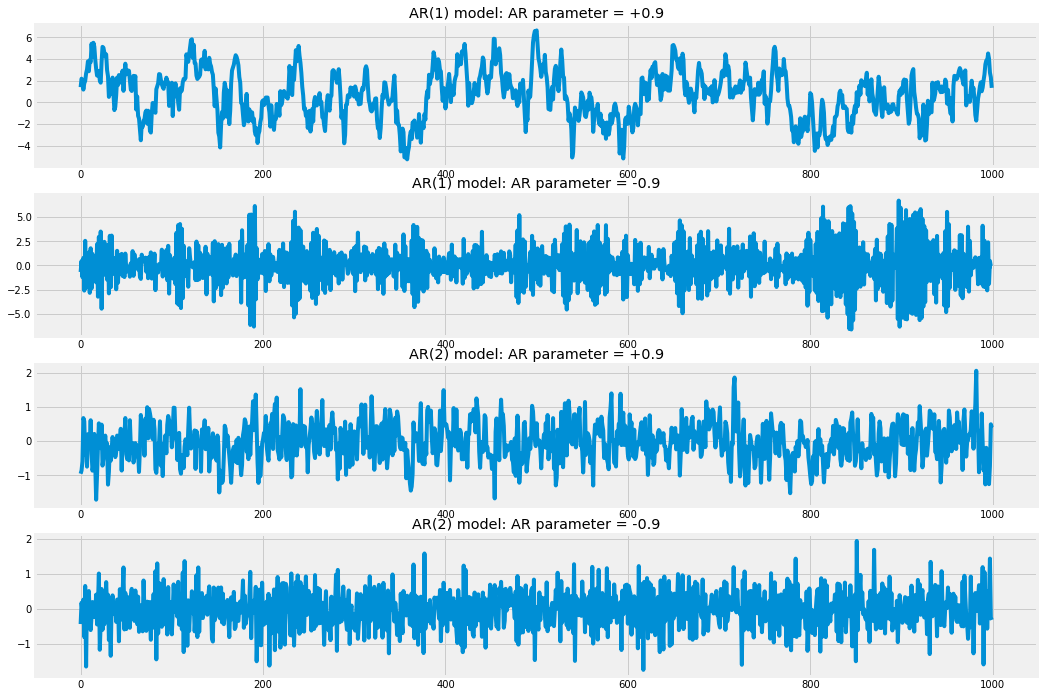

In [35]:
from statsmodels.tsa.arima_process import ArmaProcess

plt.rcParams['figure.figsize'] = 16, 12
# AR(1) MA(1) model:AR parameter = +0.9
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)
# We will take care of MA model later
# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)
# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)
# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

### Fitting

In [36]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Wed, 10 Jul 2019   AIC                           2837.403
Time:                        12:26:29   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    Roots           

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

### Forecast

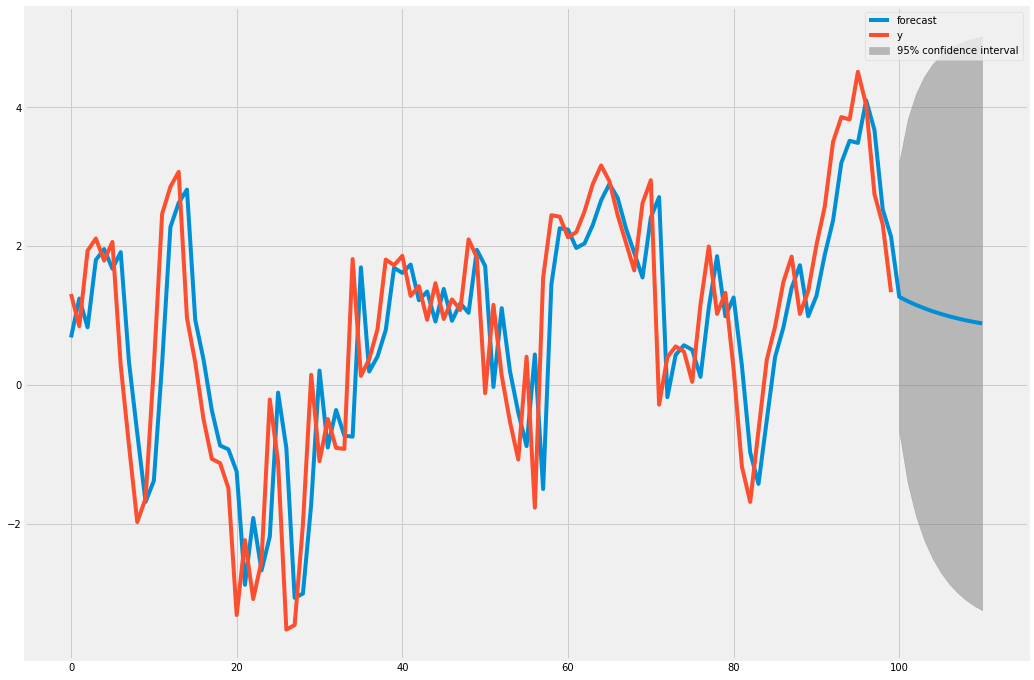

In [37]:
# Predicting simulated AR(1) model 
result.plot_predict(start=900, end=1010)
plt.show()

#### Examples with real data

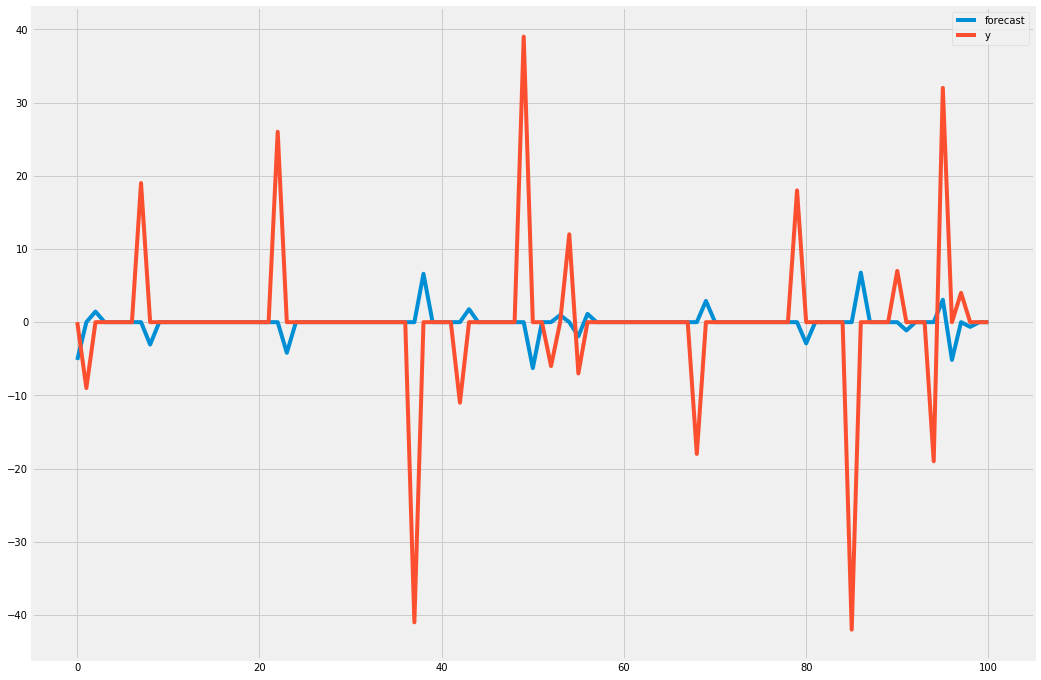

In [46]:
# Predicting humidity level of Montreal
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [47]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 7.2183885634741936.


 Not quite impressive. But let's try google stocks. 

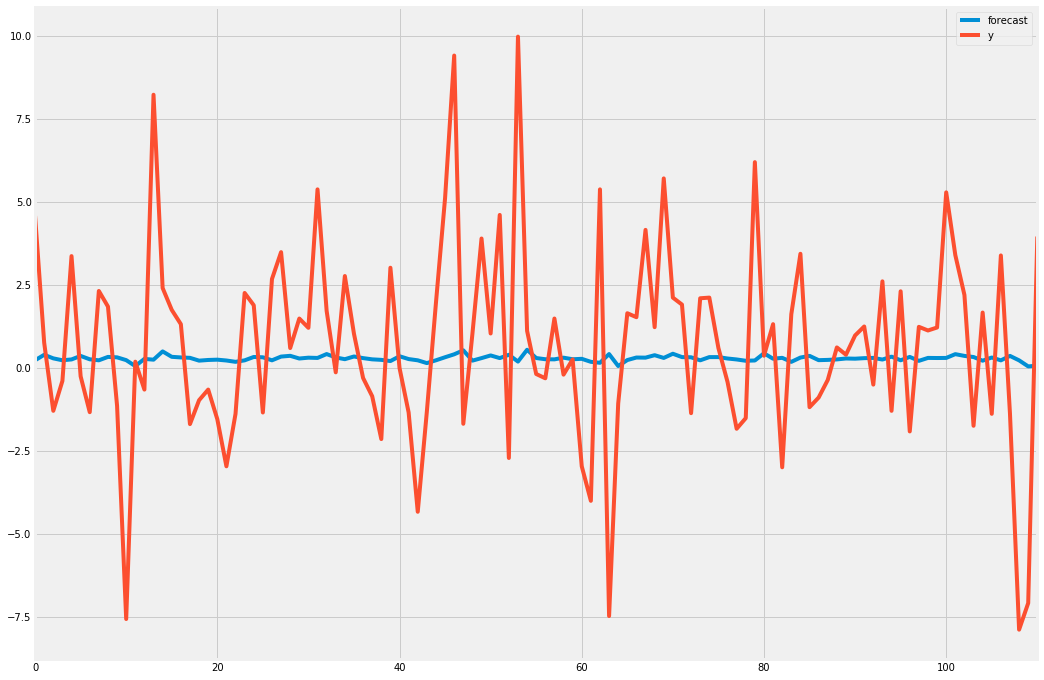

In [20]:
# Predicting closing prices of google
goog = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = goog.fit()
res.plot_predict(start=900, end=1010)
plt.show()

There are always better models.

## MA models
The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.
#### MA(1) model
R<sub>t</sub> = μ  +  ϵ<sub>t</sub> + θϵ<sub>t-1</sub>

It translates to Today's returns = mean + today's noise + yesterday's noise
##### As there is only 1 lagged noise, it is an MA model of order 1

### Simulating MA(1) model

### Fitting

In [48]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1807.358
Method:                       css-mle   S.D. of innovations              1.474
Date:                Wed, 10 Jul 2019   AIC                           3620.717
Time:                        12:43:22   BIC                           3635.440
Sample:                             0   HQIC                          3626.313
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6967      0.081      8.586      0.000       0.538       0.856
ma.L1.y        0.7415      0.016     45.707      0.000       0.710       0.773
                                    Roots           

### Forecasting

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Wed, 10 Jul 2019   AIC                         307043.965
Time:                        12:43:49   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

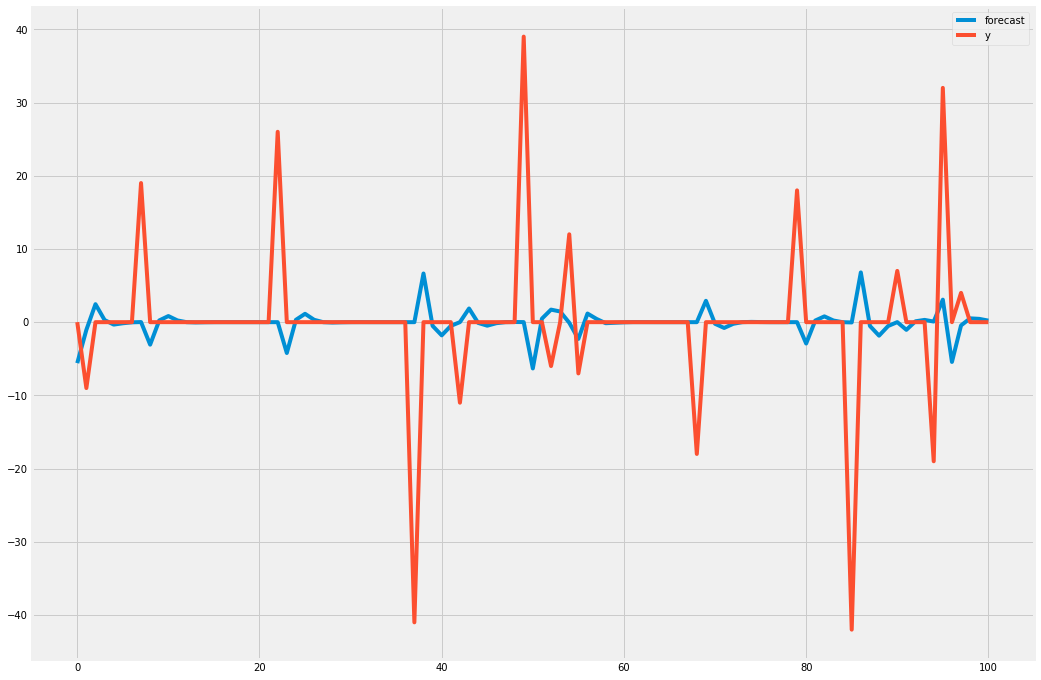

In [49]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [23]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.345130161821896.


## ARMA models
Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.
### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

### Forecasting using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751607.580
Date:                Thu, 30 May 2019   AIC                         110833.948
Time:                        18:13:47   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9914.396     -2.047      0.041   -3.97e+04    -865.362
ar.L1.y        0.2053      0.160      1.287      0.198      -0.107       0.518
ar.L2.y        0.7296      0.179      4.078      0.0

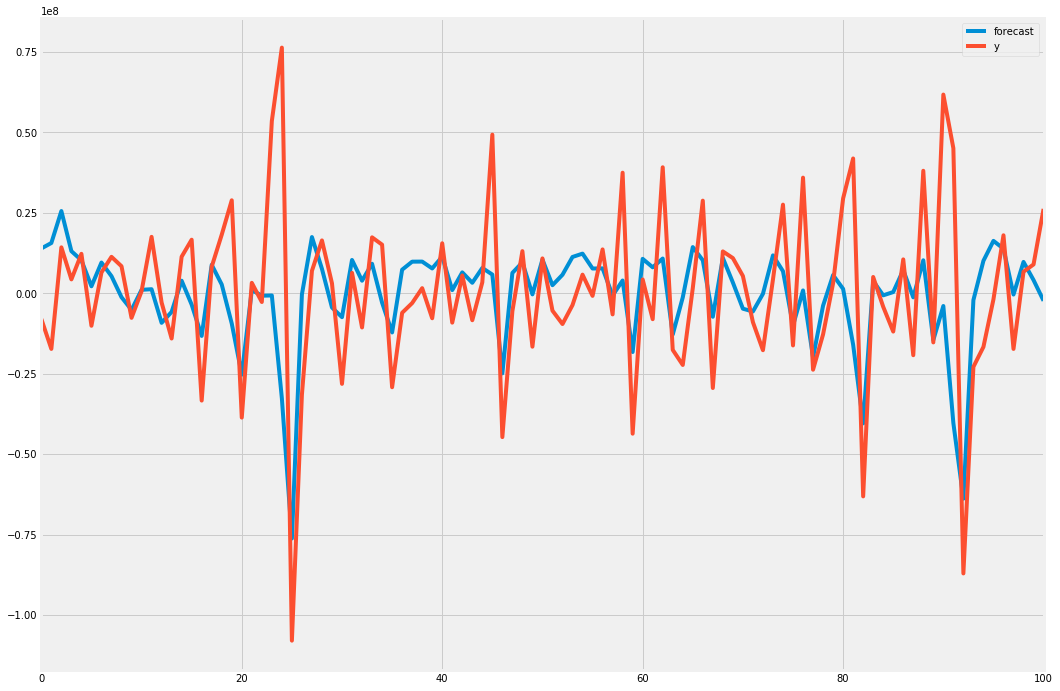

In [24]:
# Forecasting and predicting microsoft stocks volume
model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [25]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038275.61910184.


## Model identification

How can we choose the most appropriate order for modeling our data?

* Partial autocorrelation function
* Information criteria

![](images/pacf_ident.png)
![](images/bic.png)

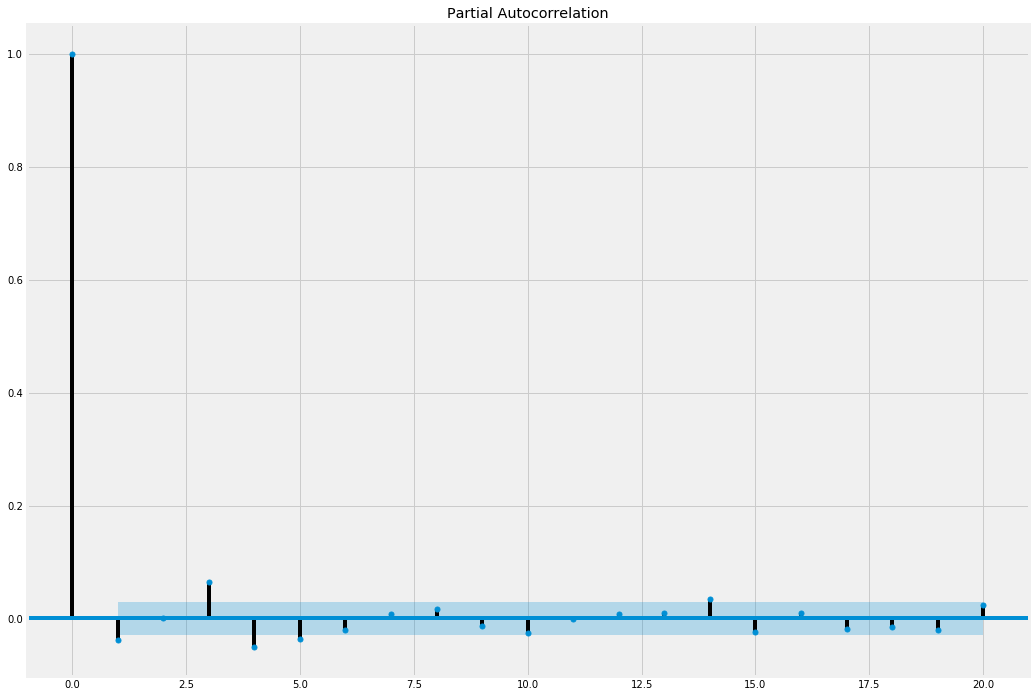

In [26]:
data = amazon.asfreq('D', method='ffill').Close.diff().dropna()
fig = plot_pacf(data, lags=20, alpha=0.05)

Text(0, 0.5, 'Bayesian Information Criterion')

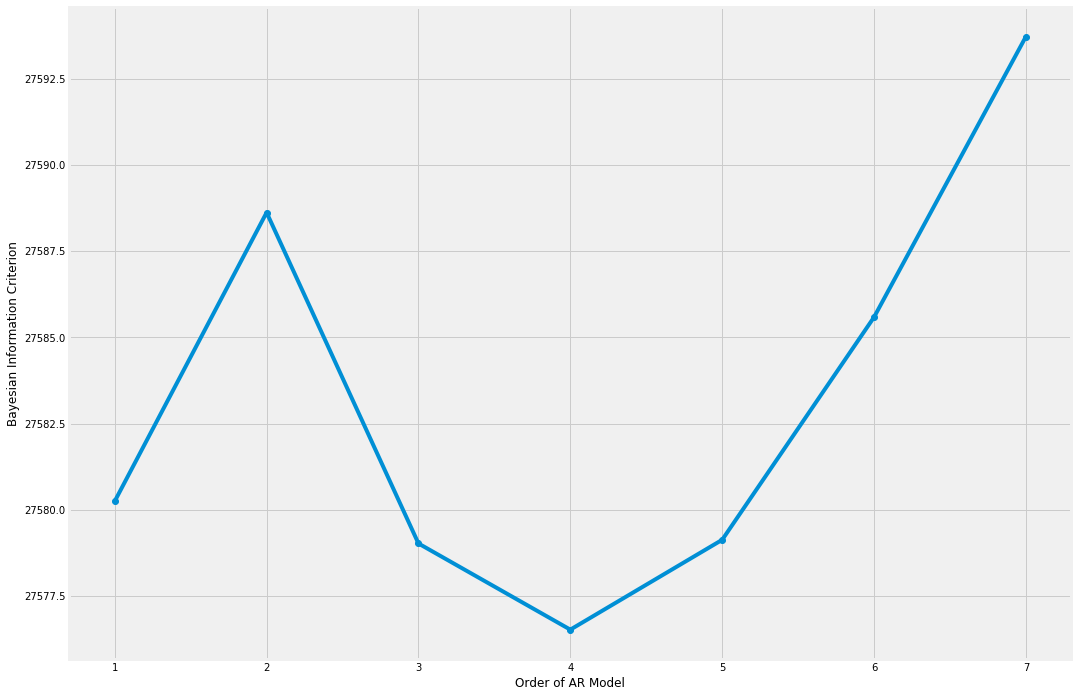

In [27]:
n = 8
BIC = np.zeros(n)
for p in range(n):
    mod = ARMA(data, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
plt.plot(range(1,n), BIC[1:n], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')

## Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
* Strong stationarity:  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as  non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

Example of nonstationary series include:

![](images/stationarity1.png)
![](images/stationarity2.png)

### Decomposition of series

We will try to decompose seasonal component of the above decomposed time series.

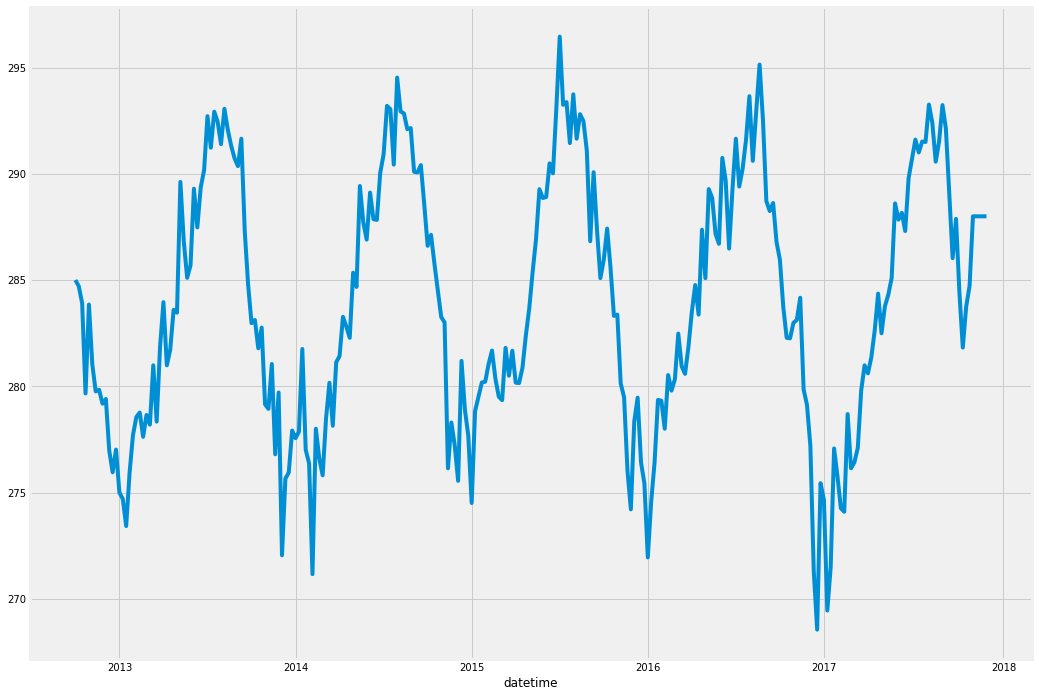

In [50]:
import pandas as pd

temperature = pd.read_csv('weather/temperature.csv',index_col='datetime', parse_dates=['datetime'])
temperature = temperature.iloc[1:]
temperature = temperature.fillna(method='ffill')
temperature = temperature.resample('W').mean()
temperature['Vancouver'].plot()

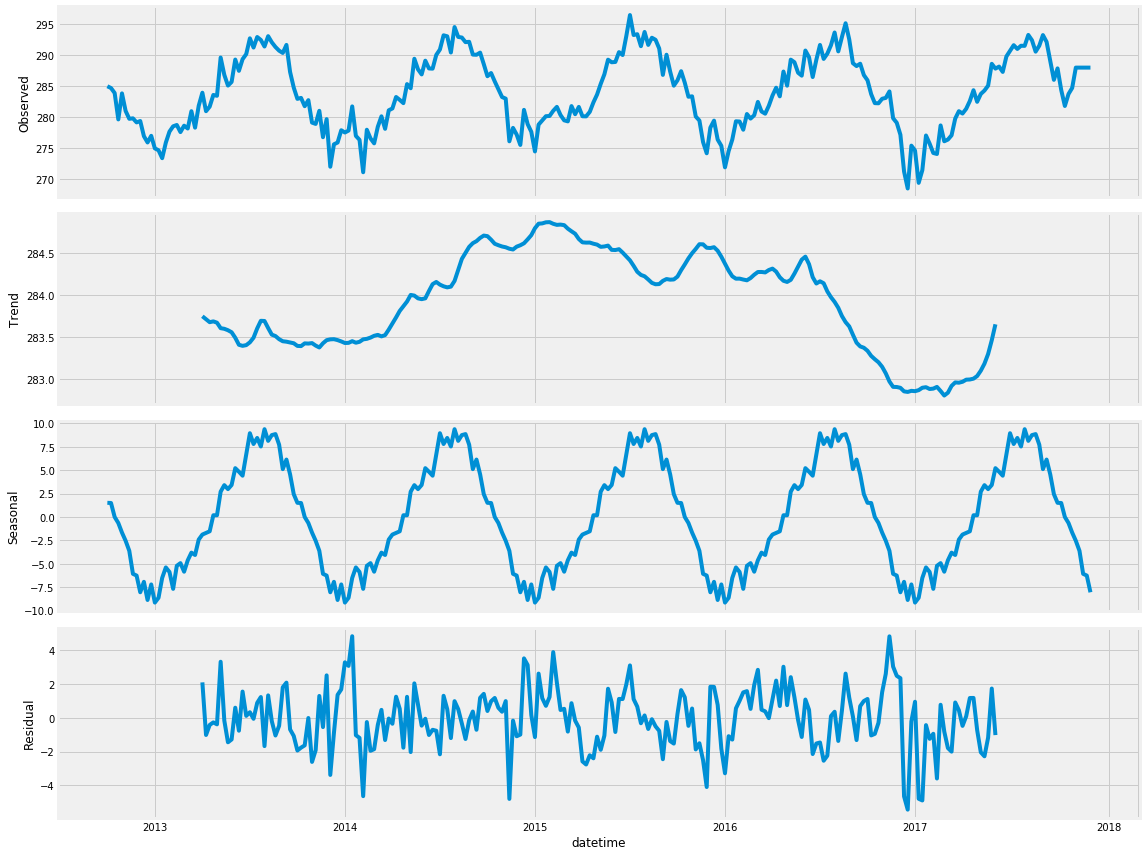

In [51]:
decomposed_temperature = sm.tsa.seasonal_decompose(temperature['Vancouver'])
fig = decomposed_temperature.plot()

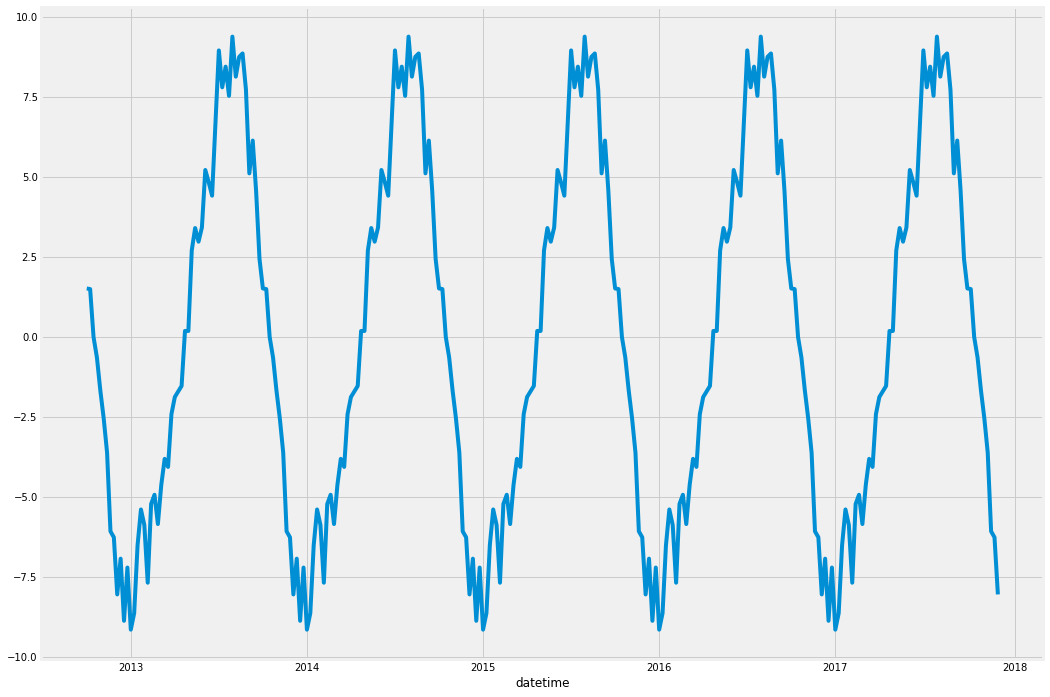

In [52]:
decomposed_temperature.seasonal.plot()

### Transorm nonstationary series in stationary series

![](images/tostat1.png)
![](images/tostat2.png)
![](images/tostat3.png)



[Data transformation guidelines](http://people.duke.edu/~rnau/whatuse.htm)

## ARIMA models
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.
ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter
### ARIMA(1,0,0)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub>**
### ARIMA(1,0,1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>**
### ARIMA(1,1,1)
**Δy<sub>t</sub> = a<sub>1</sub>Δy<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>** where **Δy<sub>t</sub> = y<sub>t</sub> - y<sub>t-1</sub>**

## Prediction using ARIMA model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.008
Date:                Wed, 10 Jul 2019   AIC                         112778.933
Time:                        13:01:38   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

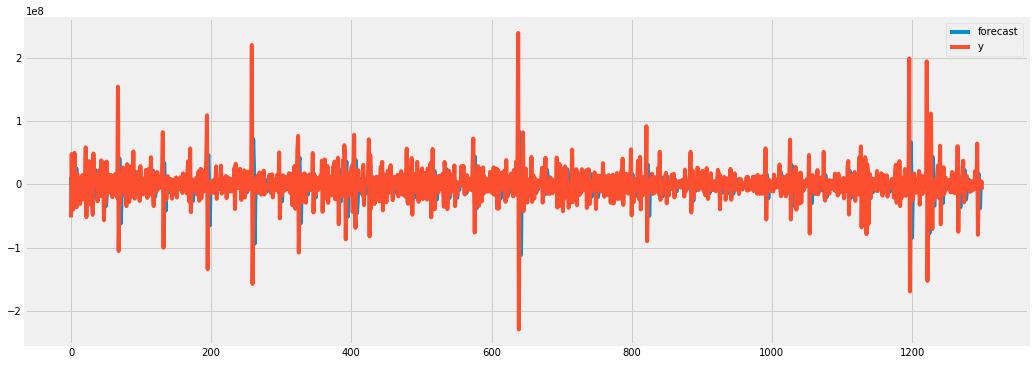

In [55]:
# Predicting the microsoft stocks volume
plt.rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=2000)
plt.show()

## SARIMA models
SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models 

In [32]:
train_sample = temperature['Vancouver']
model = sm.tsa.SARIMAX(train_sample,order=(2,1,0), trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=150, end=200)

                           Statespace Model Results                           
Dep. Variable:              Vancouver   No. Observations:                  270
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -599.588
Date:                Thu, 30 May 2019   AIC                           1207.176
Time:                        18:13:53   BIC                           1221.555
Sample:                    10-07-2012   HQIC                          1212.950
                         - 12-03-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0152      0.143      0.107      0.915      -0.264       0.295
ar.L1         -0.2275      0.062     -3.652      0.000      -0.350      -0.105
ar.L2         -0.0815      0.053     -1.536      0.1

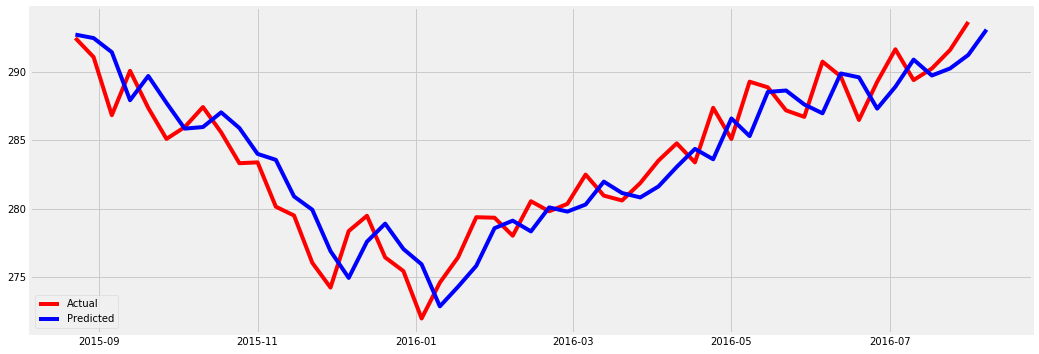

In [33]:
plt.plot(train_sample[150:200],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.show()